<h1>Import libraries</h1>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt

<h1>Import data</h1>

In [2]:
train_df = pd.read_csv('data/training_data.csv')
test_df = pd.read_csv('data/testing_data.csv')

In [3]:
train_df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                      int64
dtype: object

In [4]:
train = train_df.copy()
test = test_df.copy()

In [5]:
train['VisitorType'].unique()

array(['New_Visitor', 'Returning_Visitor', 'Other'], dtype=object)

In [6]:
train['Month'].unique()

array(['May', 'Nov', 'Jul', 'Dec', 'Mar', 'Oct', 'June', 'Aug', 'Sep',
       'Feb'], dtype=object)

In [7]:
train['Weekend'].unique()

array([ True, False])

Replace the strings in the dataset with numbers.

In [8]:
visitor_type = {'New_Visitor': 0, 'Returning_Visitor': 1, 'Other': 2}
month = {'Feb': 0, 'Mar': 1, 'May': 2, 'June': 3, 'Jul': 4, 'Aug': 5, 'Sep': 6,
         'Oct': 7, 'Nov': 8, 'Dec': 9}
weekend = {True: 1, False: 0}

In [9]:
train['VisitorType'] = train['VisitorType'].apply(lambda x: visitor_type[x])
test['VisitorType'] = test['VisitorType'].apply(lambda x: visitor_type[x])

train['Month'] = train['Month'].apply(lambda x: month[x])
test['Month'] = test['Month'].apply(lambda x: month[x])

train['Weekend'] = train['Weekend'].apply(lambda x: weekend[x])
test['Weekend'] = test['Weekend'].apply(lambda x: weekend[x])

In [10]:
test.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                      int64
dtype: object

In [11]:
train.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                      int64
Revenue                      int64
dtype: object

In [12]:
train.shape, test.shape

((9864, 18), (2466, 17))

Create a correlation map to see columns that are heavily correlated.

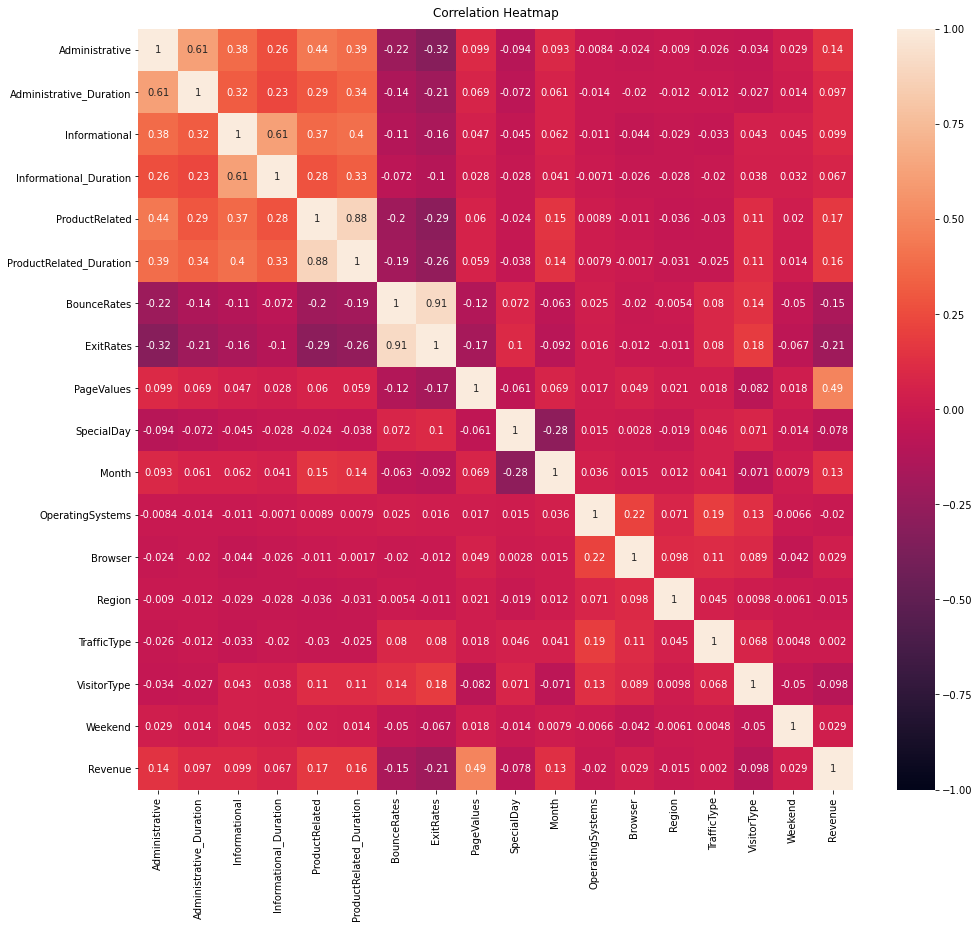

In [13]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 14))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Remove some of the heavily correlated columns.

In [14]:
train_final = train.drop(columns=['ProductRelated', 'BounceRates', 'Informational'])
test_final = test.drop(columns=['ProductRelated', 'BounceRates', 'Informational'])

In [15]:
X = train_final.drop(columns=['Revenue'])
y = train_final['Revenue']

In [16]:
X = StandardScaler().fit_transform(X)
test_final = StandardScaler().fit_transform(test_final)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=4, stratify=y)

<h1>Modelling</h1>

In [18]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [19]:
# output scores
def test_scores(model, X_test, y_test):
    X_test_pred = model.predict(X_test)        
    print('Accuracy: ', accuracy_score(y_test, X_test_pred))
    print('Precision: ', precision_score(y_test, X_test_pred))
    print('Recall: ', recall_score(y_test, X_test_pred))
    print('F1 Score: ', f1_score(y_test, X_test_pred))
    
# prepare final output for submission
def predict(model, test_data):
    model_pred = deepcopy(model)
    model_pred.fit(X, y)
    prediction = model_pred.predict(test_data)
    prediction = np.where(prediction >= 0.5, 1, 0)
    new_df = pd.DataFrame({'Revenue': prediction})
    result = new_df.to_csv('result.csv', index=False)

In [20]:
test_scores(model, X_test, y_test)

Accuracy:  0.8962837837837838
Precision:  0.6623655913978495
Recall:  0.6724890829694323
F1 Score:  0.66738894907909


In [21]:
predict(model, test_final)